In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import pivio as piv
import seaborn as sns
import math as math

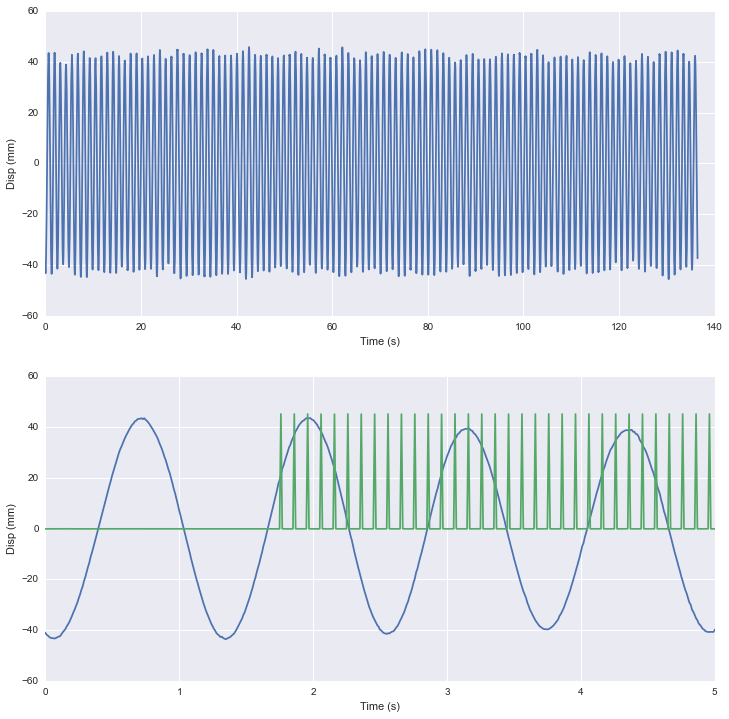

In [2]:
plt.figure(figsize=(12,12))
# Read in a single data file:
dat = np.loadtxt('/nas-6000/wclab/James/AMOG/20150129/PIV/r_9_35/barehz19.dat',skiprows=23,delimiter='\t')

# Rename columns to new variables:
time = dat[:,0]; lift = dat[:,1]; drag = dat[:,2]; disp = 1000*(dat[:,3]-np.mean(dat[:,3]))/29.1; pulse = dat[:,4]

plt.subplot(2,1,1)
plt.plot(time,disp)
plt.xlabel('Time (s)')
plt.ylabel('Disp (mm)')


plt.subplot(2,1,2)

plt.plot(time,disp)
plt.xlabel('Time (s)')
plt.ylabel('Disp (mm)')

plt.xlim(0,5)
plt.plot(time,pulse*20)

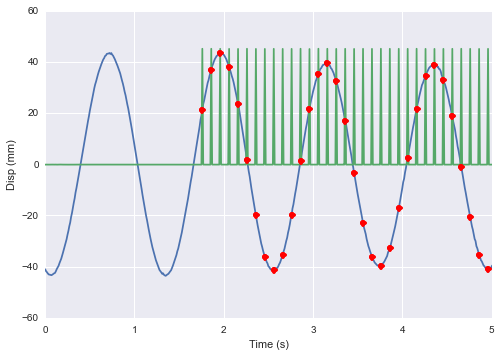

In [3]:
inst = pulse > 1
inst[1299:] = 0
plt.plot(time,disp)
plt.xlabel('Time (s)')
plt.ylabel('Disp (mm)')

plt.xlim(0,5)
plt.plot(time,pulse*20)
plt.plot(time[inst],disp[inst],'ro')

[False False False  True  True False False False False False False False
 False False False  True False False False False False False False False
 False False False  True False False False False False False False False
 False False False  True  True False False False False False False False
 False]


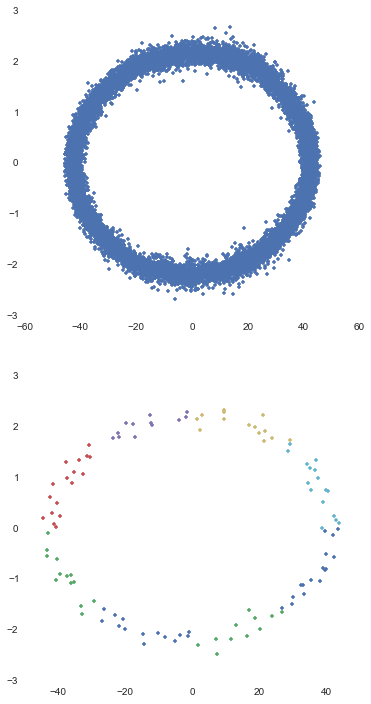

In [115]:
plt.figure(figsize=(6,12))
velo = np.gradient(disp)

# Phase at each PIV pulse:
phase = np.arctan2(disp[inst]/np.max(abs(disp)),velo[inst]/np.max(abs(velo)))

plt.subplot(2,1,1)
plt.plot(disp,velo,'.')

plt.subplot(2,1,2)
for bin in range(8):
    llim = bin*(np.pi/4)-np.pi
    ulim = (bin+1)*(np.pi/4)-np.pi
    instances_in_bin = (phase > llim) & (phase < ulim)
    plt.plot(disp[inst][instances_in_bin],velo[inst][instances_in_bin],'.')
    
print(instances_in_bin[1:50])

In [116]:
p = piv.pivio('/nas-6000/wclab/James/AMOG/20150129/PIV/r_9_35/RESULTS/barehz19.0032.gam.10.piv')

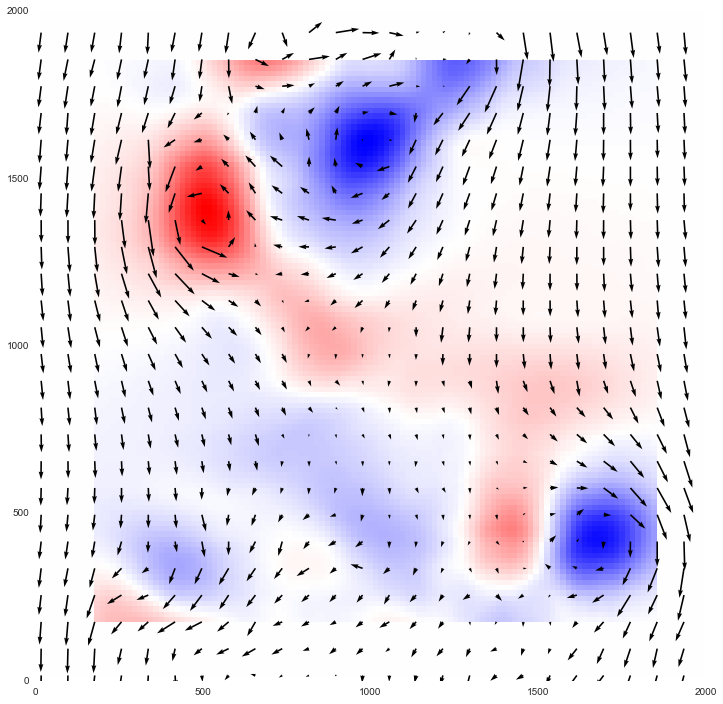

In [145]:
plt.figure(figsize=(12,12))
x = np.arange(p.x0,p.ix,p.dx)
y = np.arange(p.y0,p.iy,p.dy)

plt.pcolormesh(x,y,p.read_frame2(0)[3],cmap='bwr')
plt.quiver(x[::5],y[::5],p.read_frame2(0)[1][::5,::5],p.read_frame2(0)[2][::5,::5])

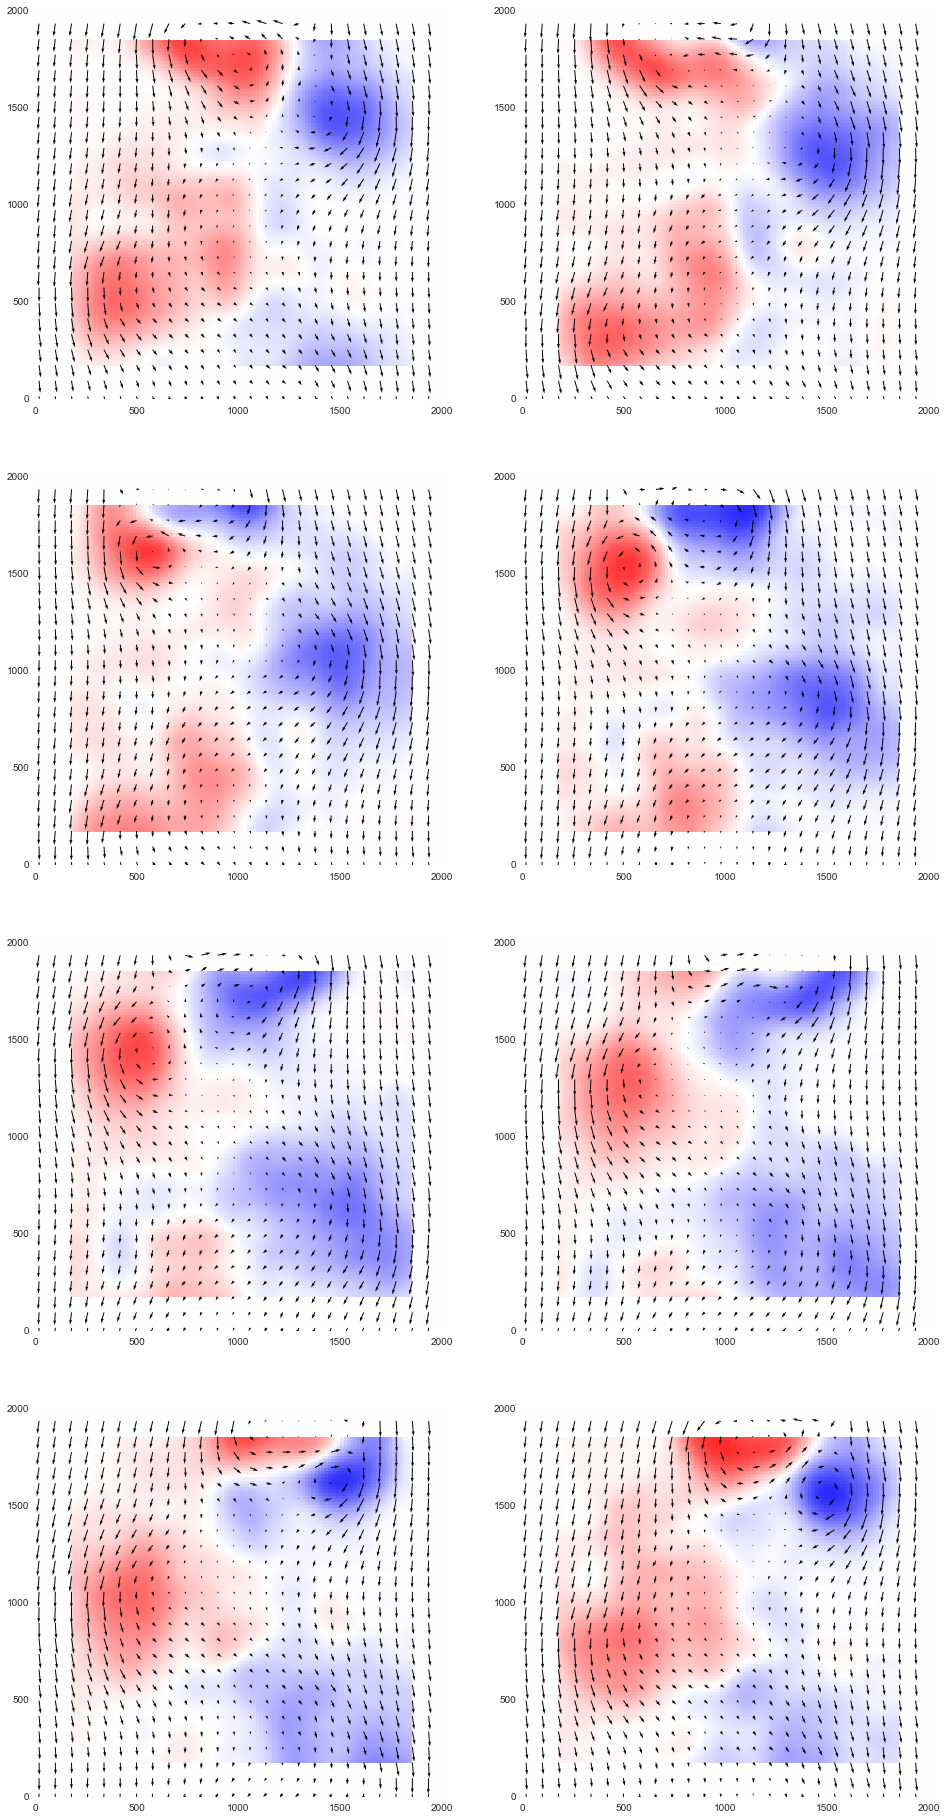

In [148]:
plt.figure(figsize=(16,32))
for bin in np.arange(7,-1,-1):
    llim = bin*(np.pi/4)-np.pi
    ulim = (bin+1)*(np.pi/4)-np.pi
    instances_in_bin = (phase > llim) & (phase < ulim)
    pivdat = np.mean([p.read_frame2(i) for i in range(len(instances_in_bin)) if instances_in_bin[i]],0)
    
    plt.subplot(4,2,bin+1)
    plt.pcolormesh(x,y,pivdat[4],cmap='bwr')
    plt.clim(-1,1)
    plt.quiver(x[::5],y[::5],pivdat[1][::5,::5],pivdat[2][::5,::5])